### Install dependenies

In [1]:
import os
import sys
root = os.path.split(os.getcwd())[0]
if root not in sys.path:
    sys.path.append(root)
!{sys.executable} -m pip install numpy pandas intervaltree matplotlib

import numpy as np
import pandas as pd

You should consider upgrading via the '/Users/alex/dev/mellow-strategy-sdk/.venv/bin/python3.9 -m pip install --upgrade pip' command.


### Prepare data

Done


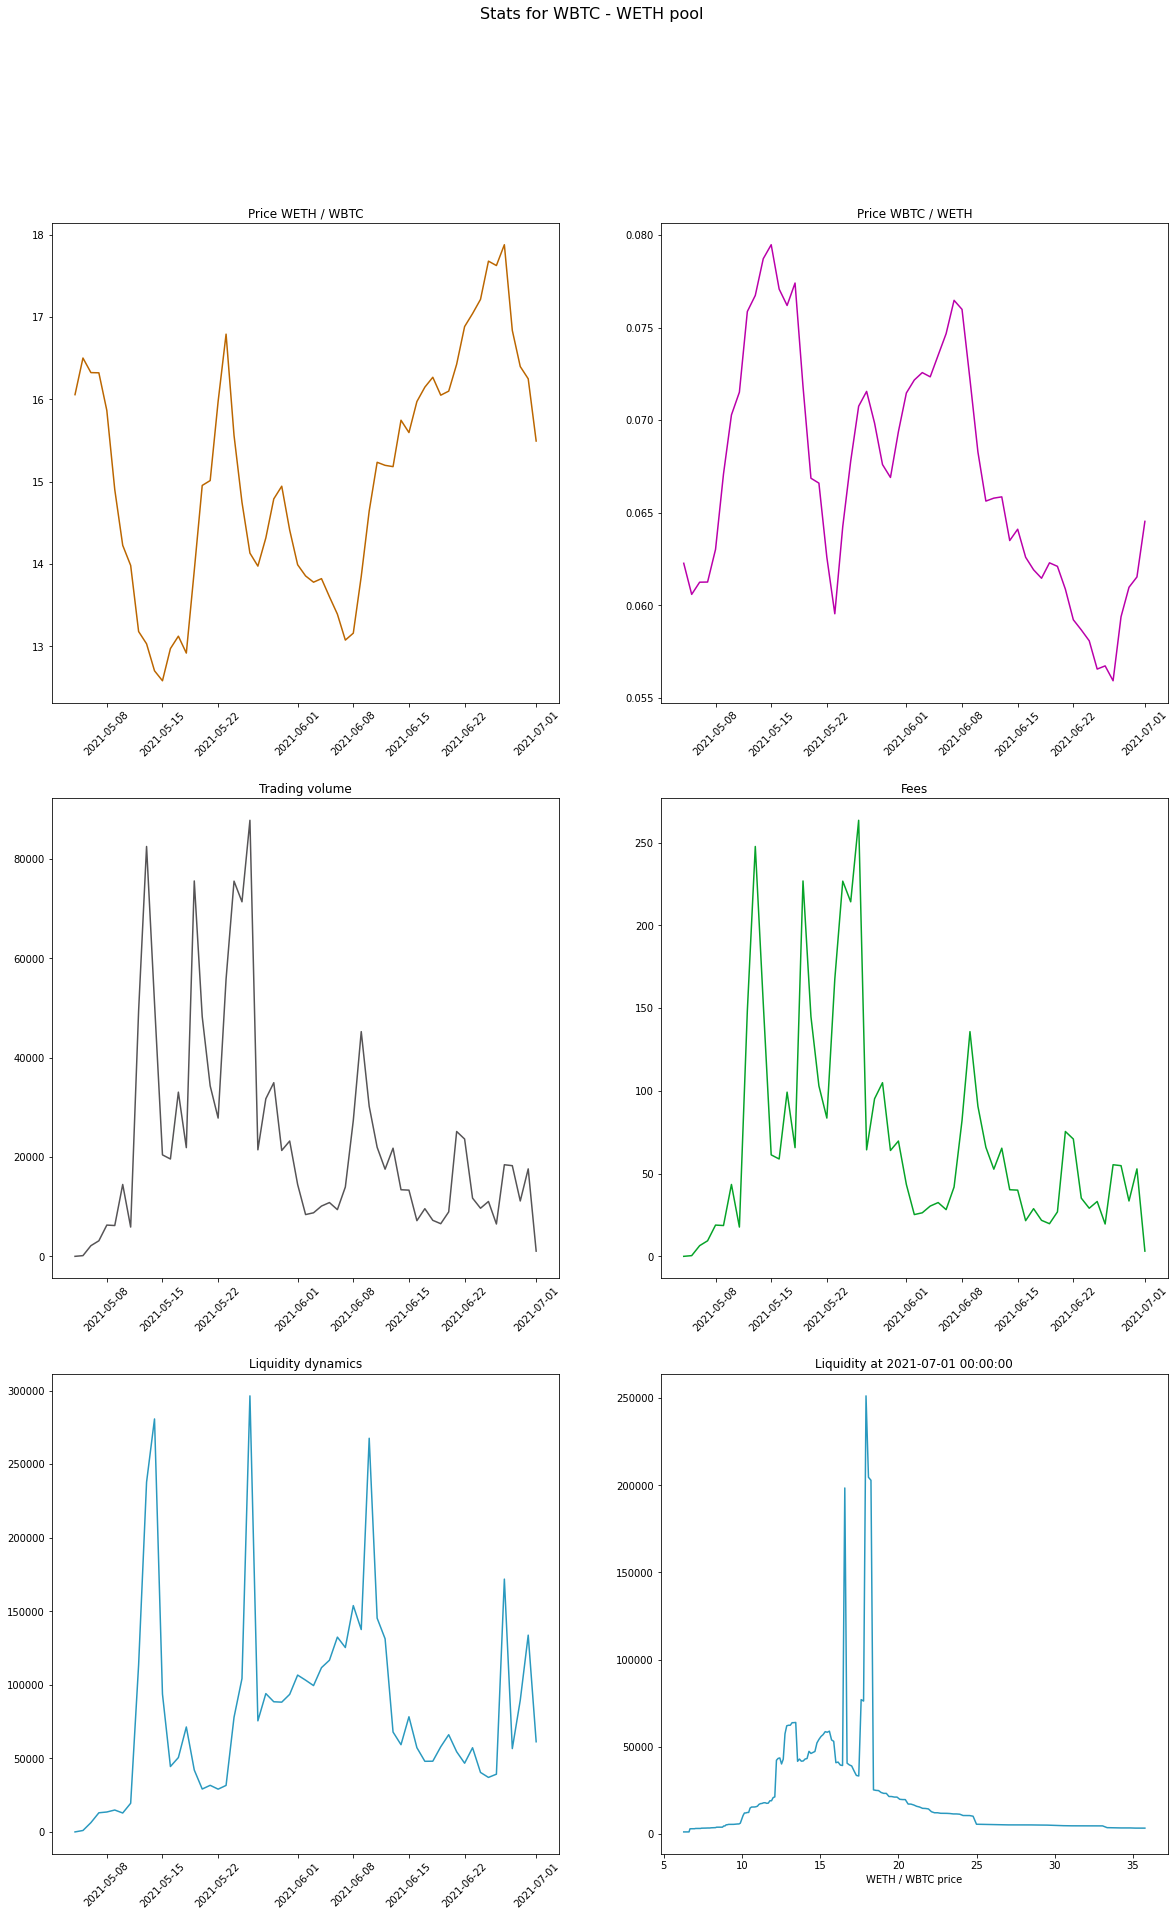

In [2]:
from strategy import PoolData, Pool, Token, Fee, Frequency
pool = Pool(Token.WBTC, Token.WETH, Fee.MIDDLE)
data = PoolData.from_pool(pool, Frequency.DAY)
data.plot()

### Define strategy

In [3]:
from strategy import Position, AbstractStrategy 
from datetime import datetime
from typing import Callable

class TickStrategy(AbstractStrategy):        
    def rebalance(
        self,
        t: datetime,
        c: float,
        vol: float,
        l: Callable[[float], float],
        pool_data: PoolData,
    ) -> bool:
        if not self.portfolio.position("main"):
            self.portfolio.add_position(Position(id="main", a = c / 1.0001 ** 60, b = c * 1.0001 ** 60))
            pos = self.portfolio.position("main")
            pos.deposit(c, 1 / 2 / c, 1 / 2, pool_data.pool.fee.percent)
        else:
            pos = self.portfolio.position("main")
            pos.rebalance(c / 1.0001 ** 60, c * 1.0001 ** 60, c, pool_data.pool.fee.percent)
            return True

        return False

### Backtest

16.503935377928574 0.0 1.0022622948432736 15.96256201935217 16.15525698658151 41.686658775973164 0.003
16.32660224378469 0.06154309325215872 0.0 16.40521316448142 16.603251675422683 41.67186045023773 0.003
16.324327653275464 0.03172830574629084 0.49446781599510575 16.228940790642234 16.424851397600467 41.82744109394744 0.003
15.867430611809807 0.06345670359785859 0.0 16.226679806136946 16.422563119209986 42.73315632664211 0.003
14.905033729477688 0.06368893395305826 0.0 15.772515802956889 15.962916592760578 42.28507405786683 0.003
14.228179905592214 0.06537330804176213 0.0 14.815875726396412 14.994728261729447 42.06653641508321 0.003
13.983509780915389 0.06817729491705005 0.0 14.143070664587619 14.313801311392996 42.863166543017954 0.003
13.180655413011847 0.06916867850652958 0.0 13.899864092434441 14.067658826922347 43.11092940964241 0.003
13.031284691539408 0.0704472179408273 0.0 13.101812188819578 13.259973094776203 42.628707206447054 0.003
12.703371961202997 0.0709122710637487 0.0 

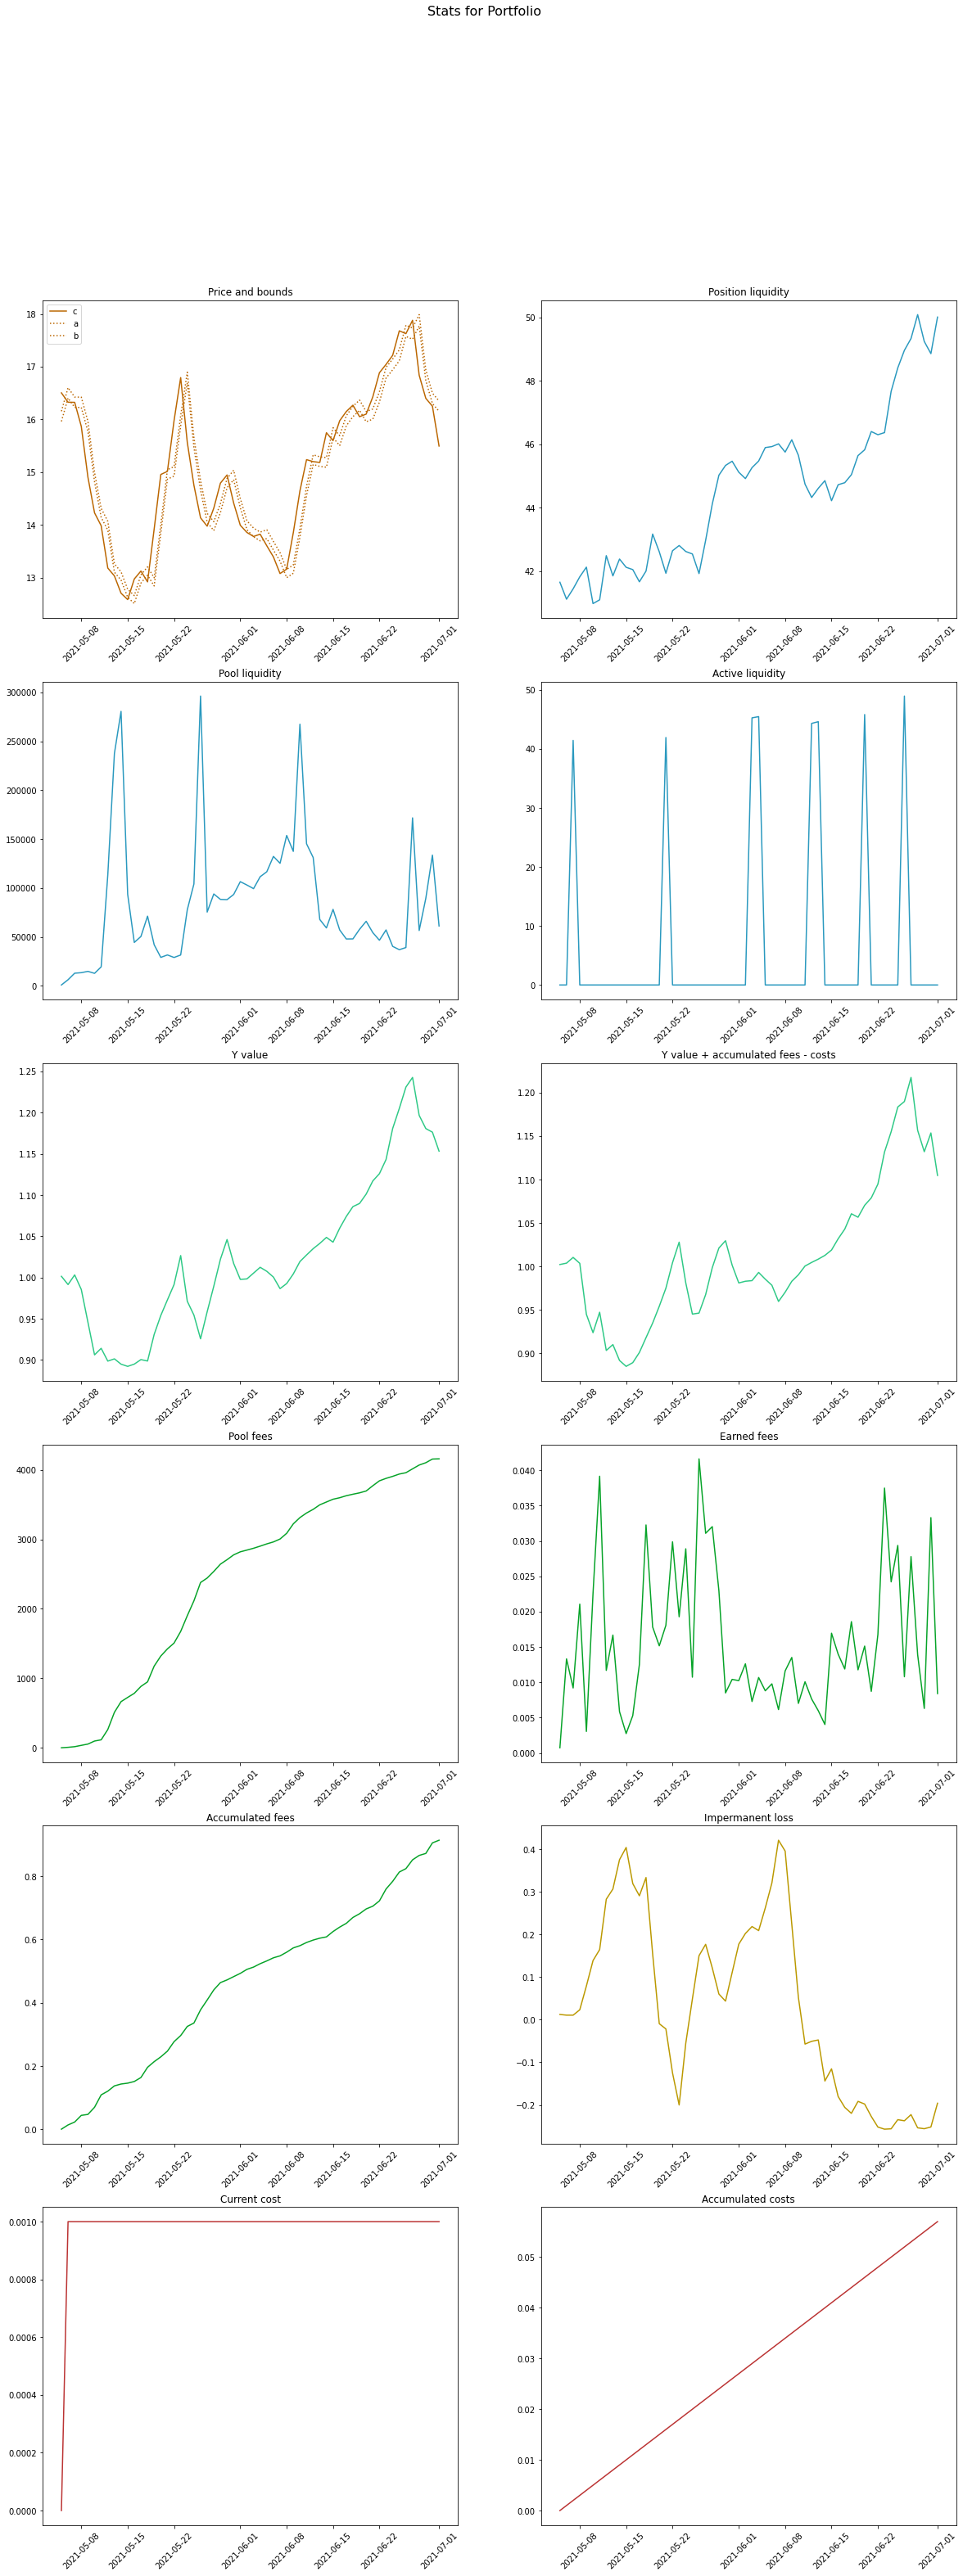

In [4]:
from strategy import Backtest

backtest = Backtest(TickStrategy)
backtest.run(data, 0.001)
backtest.plot()

In [5]:
backtest.history

,c,l,al,pool_fee,pool_fees,pool_l,a,b,y,net_y,fees,cost,costs,il
2021-05-05,16.503935,41.655044,0.0,0.425817,0.425817,972.189773,15.962562,16.155257,1.001502,1.002241,0.000739,0,0,0.012363
2021-05-06,16.326602,41.120315,0.0,6.441948,6.867765,6313.936468,16.405213,16.603252,0.991491,1.003813,0.013322,0.001,0.001,0.010731
2021-05-07,16.324328,41.447279,41.447279,9.398283,16.266048,13002.226017,16.228941,16.424851,1.003209,1.010412,0.009203,0.001,0.002,0.010717
2021-05-08,15.867431,41.82595,0.0,18.881436,35.147485,13540.454928,16.22668,16.422563,0.985519,1.003592,0.021073,0.001,0.003,0.02329
2021-05-09,14.905034,42.130791,0.0,18.620187,53.767671,14882.152638,15.772516,15.962917,0.945822,0.94487,0.003047,0.001,0.004,0.079154
2021-05-10,14.22818,40.982577,0.0,43.432326,97.199998,12854.304959,14.815876,14.994728,0.906175,0.923756,0.022581,0.001,0.005,0.138755
2021-05-11,13.98351,41.1002,0.0,17.691556,114.891553,19479.13181,14.143071,14.313801,0.914146,0.947321,0.039175,0.001,0.006,0.164518
2021-05-12,13.180655,42.492928,0.0,148.427163,263.318716,113535.133152,13.899864,14.067659,0.898619,0.903309,0.011689,0.001,0.007,0.282754
2021-05-13,13.031285,41.854945,0.0,247.668267,510.986984,237756.074738,13.101812,13.259973,0.901355,0.910049,0.016695,0.001,0.008,0.306614
2021-05-14,12.703372,42.386374,0.0,153.077671,664.064655,280727.804889,12.953335,13.109703,0.894915,0.891764,0.005849,0.001,0.009,0.375452
